In [1]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.impute import SimpleImputer

In [2]:
os.chdir('/kaggle/input/physionet-challenge-2019early-detection-of-sepsis/training_setA/training')
extension ='psv'
filenames = [i for i in glob.glob('*{}'.format(extension))]

In [3]:
trainn = pd.concat([pd.read_csv(f , sep='|') for f in filenames])
trainn.to_csv('trainn.csv', index=False)

OSError: [Errno 30] Read-only file system: 'trainn.csv'

In [4]:
print(trainn.head())
a,b = trainn.shape
x   = trainn.size
a*b != x

     HR  O2Sat  Temp   SBP    MAP  DBP  Resp  EtCO2  BaseExcess  HCO3  ...  \
0   NaN    NaN   NaN   NaN    NaN  NaN   NaN    NaN         NaN   NaN  ...   
1  85.0   72.0   NaN  94.0  62.67  NaN   NaN    NaN         NaN   NaN  ...   
2  87.0   92.0   NaN  92.0  62.00  NaN   NaN    NaN         NaN   NaN  ...   
3  85.0   94.0   NaN  92.0  60.67  NaN   NaN    NaN         NaN   NaN  ...   
4  88.0   91.0   NaN  79.0  53.67  NaN   NaN    NaN        -3.0   NaN  ...   

   WBC  Fibrinogen  Platelets    Age  Gender  Unit1  Unit2  HospAdmTime  \
0  NaN         NaN        NaN  74.88       1    1.0    0.0      -113.88   
1  NaN         NaN        NaN  74.88       1    1.0    0.0      -113.88   
2  NaN         NaN        NaN  74.88       1    1.0    0.0      -113.88   
3  NaN         NaN        NaN  74.88       1    1.0    0.0      -113.88   
4  NaN         NaN        NaN  74.88       1    1.0    0.0      -113.88   

   ICULOS  SepsisLabel  
0       1            0  
1       2            0  
2    

False

In [5]:
print('The dimensions of the given Training A dataset is:',trainn.shape)
print('The total number of data in given Training A dataset is',trainn.size)

The dimensions of the given Training A dataset is: (790215, 41)
The total number of data in given Training A dataset is 32398815


/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:203: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  "'colors' is being deprecated. Please use 'color'"


0    773079
1     17136
Name: SepsisLabel, dtype: int64

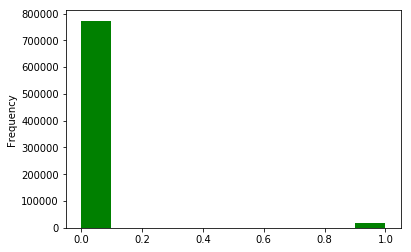

In [6]:
trainn.SepsisLabel.plot.hist( colors = "g")
trainn['SepsisLabel'].value_counts()

In [7]:
features = trainn.drop('SepsisLabel', axis=1)

In [9]:
training_features, testing_features, training_target, testing_target = train_test_split(features, trainn['SepsisLabel'], random_state=None)


In [11]:
imputer = SimpleImputer(strategy="median")
imputer.fit(training_features)
training_features = imputer.transform(training_features)
testing_features = imputer.transform(testing_features)

In [13]:
exported_pipeline = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False, interaction_only=False),
    ExtraTreesClassifier(bootstrap=False, criterion="entropy", max_features=0.7500000000000001, min_samples_leaf=1, min_samples_split=5, n_estimators=100)
)

In [ ]:
exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(testing_target,results)
cm

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(testing_target,results)
accuracy